# World Data League 2022

## Notebook Submission Template

## 🎯 Challenge
Predict Waste Production for its Reduction


## 👥 Authors
* Sandra Martínez Sanchis
* Mónica López Lacort
* Madría Rodríguez González
* Francisca Ruíz Pérez

## 💻 Development

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
import datetime

### 1. EDA

In [15]:
# read csv (dataset1) with weight of load, date, drop off, type of load and type of route of Austin city.
url = 'https://data.austintexas.gov/resource/mbnu-4wq9.csv'
df = pd.read_csv(url, sep=',')

In [16]:
# Look for loss values
# print number of values for each column
df=df.sort_values( by=['load_time'] )
print(df.count()) # total rows

report_date     1000
load_type       1000
load_time       1000
load_weight      965
dropoff_site    1000
route_type      1000
route_number    1000
load_id         1000
dtype: int64


In [17]:
# duplicated values
df1 = df.duplicated().sum() # duplicated rows

# missing values
df = df.dropna(axis=0, how ='any')
df = df.dropna() # drop all rows with NaN
print(len(df))

965


In [18]:
# number of values for each day
# parse Timestamp report_date
rd = pd.to_datetime(df['report_date']).dt.tz_localize(None) #without hours
s = df.report_date.value_counts()
print(s.head())

df = df.drop(['report_date'], axis=1)

#separate report_date column in Year/Month/Day/Hour/Dayofweek columns
df['Year'] = pd.to_datetime(df['load_time']).dt.tz_localize(None).dt.year 
df['Month'] = pd.to_datetime(df['load_time']).dt.tz_localize(None).dt.month 
df['Day'] = pd.to_datetime(df['load_time']).dt.tz_localize(None).dt.day 
df['Hour'] = pd.to_datetime(df['load_time']).dt.tz_localize(None).dt.hour
df['Dayofweek']= pd.to_datetime(df['load_time']).dt.dayofweek

2020-12-09T00:00:00.000    148
2020-12-10T00:00:00.000    138
2020-12-08T00:00:00.000    138
2020-12-11T00:00:00.000    108
2020-12-07T00:00:00.000     76
Name: report_date, dtype: int64


2004
2020


E:\Software\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


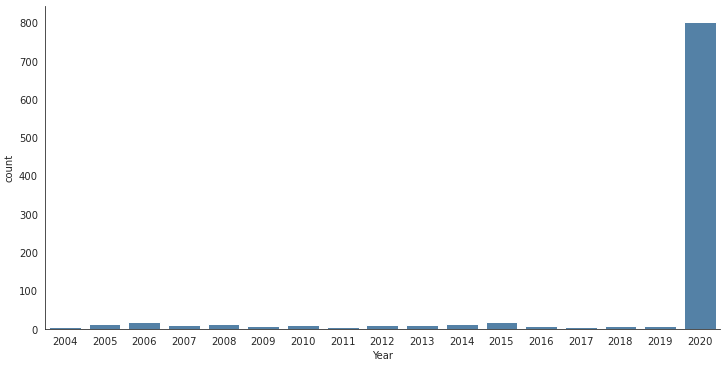

In [24]:
#Range of dates
# min(year)
print(df['Year'].min())
#max(year)
print(df['Year'].max())

#number of data for each year
with sns.axes_style('white'):
    g = sns.catplot("Year", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=1)

In [25]:
# Year to study: 2020
df_2020 = df[(df['Year'] == 2020)]
print(len(df_2020['load_type']))

802


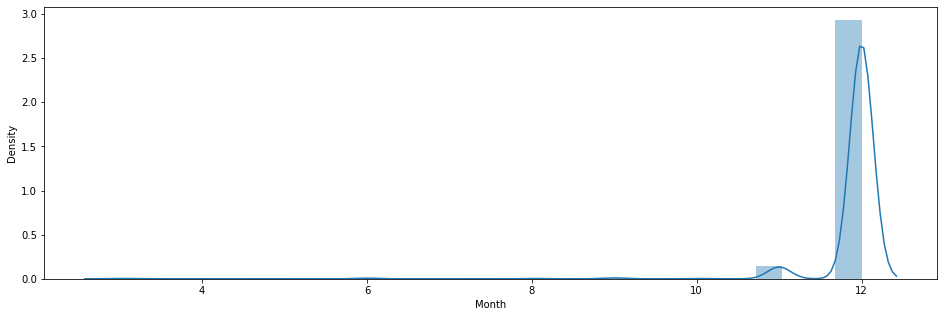

In [26]:
#Distribution of data in 2020
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
sns.distplot(df_2020['Month'])
plt.show()

In [27]:
# Select data of December (data are centred in this month)
df_2020_dic = df_2020[(df_2020['Month'] == 12)]
print(len(df_2020_dic))

756


In [28]:
# Is there any negative value in load_weight?
print(df_2020[(df_2020['load_weight'] < 0)])

Empty DataFrame
Columns: [load_type, load_time, load_weight, dropoff_site, route_type, route_number, load_id, Year, Month, Day, Hour, Dayofweek]
Index: []


In [29]:
#List of values of dropoff site in December
df_site_2020 = list(np.unique(np.array(df_2020_dic['dropoff_site'])))
print(df_site_2020)
print(len(df_site_2020))

['AUSTIN IRON AND METAL', 'BALCONES RECYCLING', 'GREAT NORTHERN', 'HORNSBY BEND', 'MRF', 'ORGANICS BY GOSH', 'TDS - MRF', 'TDS LANDFILL']
8


In [30]:
#List of values of load type
df_LoadType_2020 = list(np.unique(np.array(df_2020_dic['load_type'])))
print(df_LoadType_2020)
print(len(df_LoadType_2020))

['BRUSH', 'BULK', 'DEAD ANIMAL', 'GARBAGE COLLECTIONS', 'MIXED LITTER', 'ORGANICS', 'RECYCLED METAL', 'RECYCLING - SINGLE STREAM', 'SWEEPING', 'TIRES', 'YARD TRIMMING']
11


In [31]:
#List of values of route type
df_route_2020 = list(np.unique(np.array(df_2020_dic['route_type'])))
print(df_route_2020)
print(len(df_route_2020))

['BRUSH', 'BULK', 'DEAD ANIMAL', 'GARBAGE COLLECTION', 'KAB', 'LITTER CONTROL', 'ON CALL BULK', 'RECYCLING - SINGLE STREAM', 'STREET CLEANING-SPECIAL PROJECTS', 'SWEEPER DUMPSITES', 'YARD TRIMMINGS', 'YARD TRIMMINGS-ORGANICS']
12


In [32]:
#What type of load is accepted in each dropoff site? How many value is there in each dropoff site?
df_2020_dic.groupby(['dropoff_site', 'load_type']).size()

dropoff_site           load_type                
AUSTIN IRON AND METAL  RECYCLED METAL                 2
BALCONES RECYCLING     RECYCLING - SINGLE STREAM     88
GREAT NORTHERN         GARBAGE COLLECTIONS            1
HORNSBY BEND           BRUSH                         53
                       YARD TRIMMING                 23
MRF                    TIRES                         11
ORGANICS BY GOSH       ORGANICS                     102
TDS - MRF              GARBAGE COLLECTIONS            1
                       RECYCLING - SINGLE STREAM    102
TDS LANDFILL           BULK                         114
                       DEAD ANIMAL                    5
                       GARBAGE COLLECTIONS          237
                       MIXED LITTER                   6
                       SWEEPING                      10
                       TIRES                          1
dtype: int64

In [33]:
#Delete data with dropoff_site+load_type with less than 20 values
df_2020_dic = df_2020_dic.drop(df_2020_dic[df_2020_dic.dropoff_site == 'GREAT NORTHERN'].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[df_2020_dic.dropoff_site == 'AUSTIN IRON AND METAL'].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[df_2020_dic.dropoff_site == 'MRF'].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'TDS - MRF') & (df_2020_dic.load_type == 'GARBAGE COLLECTIONS')].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'TDS LANDFILL') & (df_2020_dic.load_type == 'TIRES')].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'AUSTIN IRON AND METAL') & (df_2020_dic.load_type == 'AUSTIN IRON AND METAL')].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'TDS LANDFILL') & (df_2020_dic.load_type == 'SWEEPING')].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'TDS LANDFILL') & (df_2020_dic.load_type == 'MIXED LITTER')].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'TDS LANDFILL') & (df_2020_dic.load_type == 'DEAD ANIMAL')].index)
df_2020_dic.groupby(['dropoff_site', 'load_type']).size()

dropoff_site        load_type                
BALCONES RECYCLING  RECYCLING - SINGLE STREAM     88
HORNSBY BEND        BRUSH                         53
                    YARD TRIMMING                 23
ORGANICS BY GOSH    ORGANICS                     102
TDS - MRF           RECYCLING - SINGLE STREAM    102
TDS LANDFILL        BULK                         114
                    GARBAGE COLLECTIONS          237
dtype: int64

In [34]:
#What type of load is there in each route?
df_2020_dic.groupby(['route_type', 'load_type']).size()

route_type                 load_type                
BRUSH                      BRUSH                         53
BULK                       BULK                         108
GARBAGE COLLECTION         GARBAGE COLLECTIONS          237
KAB                        RECYCLING - SINGLE STREAM      1
LITTER CONTROL             RECYCLING - SINGLE STREAM      1
ON CALL BULK               BULK                           6
RECYCLING - SINGLE STREAM  RECYCLING - SINGLE STREAM    188
YARD TRIMMINGS             YARD TRIMMING                 23
YARD TRIMMINGS-ORGANICS    ORGANICS                     102
dtype: int64

In [35]:
#Delete data with dropoff_site+route_type with less than 20 values
df_2020_dic = df_2020_dic.drop(df_2020_dic[df_2020_dic.route_type == 'KAB'].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[df_2020_dic.route_type == 'LITTER CONTROL'].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[df_2020_dic.route_type == 'ON CALL BULK'].index)
df_2020_dic.groupby(['dropoff_site', 'load_type']).size()

dropoff_site        load_type                
BALCONES RECYCLING  RECYCLING - SINGLE STREAM     88
HORNSBY BEND        BRUSH                         53
                    YARD TRIMMING                 23
ORGANICS BY GOSH    ORGANICS                     102
TDS - MRF           RECYCLING - SINGLE STREAM    100
TDS LANDFILL        BULK                         108
                    GARBAGE COLLECTIONS          237
dtype: int64

In [36]:
#Overview about the last changes in the dataset

#List of values of dropoff site in December
df_site_2020 = list(np.unique(np.array(df_2020_dic['dropoff_site'])))
print(df_site_2020)
print(len(df_site_2020))

#List of values of load type
df_LoadType_2020 = list(np.unique(np.array(df_2020_dic['load_type'])))
print(df_LoadType_2020)
print(len(df_LoadType_2020))

#List of values of route type
df_route_2020 = list(np.unique(np.array(df_2020_dic['route_type'])))
print(df_route_2020)
print(len(df_route_2020))

['BALCONES RECYCLING', 'HORNSBY BEND', 'ORGANICS BY GOSH', 'TDS - MRF', 'TDS LANDFILL']
5
['BRUSH', 'BULK', 'GARBAGE COLLECTIONS', 'ORGANICS', 'RECYCLING - SINGLE STREAM', 'YARD TRIMMING']
6
['BRUSH', 'BULK', 'GARBAGE COLLECTION', 'RECYCLING - SINGLE STREAM', 'YARD TRIMMINGS', 'YARD TRIMMINGS-ORGANICS']
6


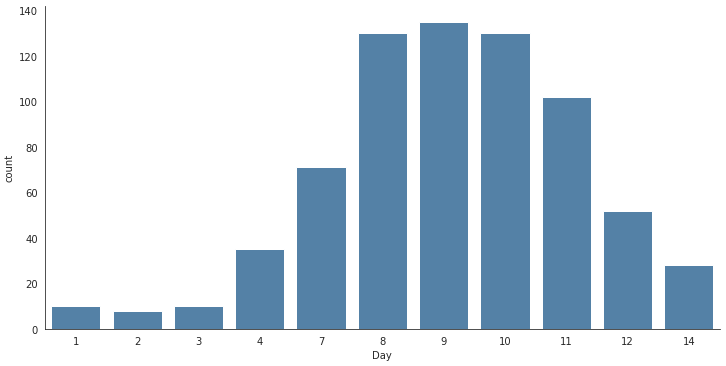

In [37]:
#number of data for each year
with sns.axes_style('white'):
    g = sns.catplot("Day", data=df_2020_dic, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=1)

In [38]:
#Where and what day is there waste?
df_2020_dic.groupby(['dropoff_site', 'Day']).size()

dropoff_site        Day
BALCONES RECYCLING  2       7
                    3      10
                    4      23
                    8       1
                    9      26
                    10     21
HORNSBY BEND        8      16
                    9      13
                    10     17
                    11     18
                    14     12
ORGANICS BY GOSH    7       1
                    8      15
                    9      15
                    10     29
                    11     42
TDS - MRF           1      10
                    2       1
                    7      36
                    8      37
                    9       4
                    14     12
TDS LANDFILL        4      12
                    7      34
                    8      61
                    9      77
                    10     63
                    11     42
                    12     52
                    14      4
dtype: int64

In [39]:
#Delete data with dropoff_site+day with less than 10 values
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'BALCONES RECYCLING') & (df_2020_dic.Day == 8)].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'BALCONES RECYCLING') & (df_2020_dic.Day == 2)].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'ORGANICS BY GOSH') & (df_2020_dic.Day == 7)].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'TDS - MRF') & (df_2020_dic.Day == 2)].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'TDS - MRF') & (df_2020_dic.Day == 9)].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.dropoff_site == 'TDS LANDFILL') & (df_2020_dic.Day == 14)].index)
df_2020_dic.groupby(['dropoff_site', 'Day']).size()

dropoff_site        Day
BALCONES RECYCLING  3      10
                    4      23
                    9      26
                    10     21
HORNSBY BEND        8      16
                    9      13
                    10     17
                    11     18
                    14     12
ORGANICS BY GOSH    8      15
                    9      15
                    10     29
                    11     42
TDS - MRF           1      10
                    7      36
                    8      37
                    14     12
TDS LANDFILL        4      12
                    7      34
                    8      61
                    9      77
                    10     63
                    11     42
                    12     52
dtype: int64

In [40]:
#What type of load is there each day?
df_2020_dic.groupby(['load_type', 'Day']).size()

load_type                  Day
BRUSH                      8      12
                           9       8
                           10     12
                           11     15
                           14      6
BULK                       8       9
                           9      18
                           10     21
                           11     10
                           12     50
GARBAGE COLLECTIONS        4      12
                           7      34
                           8      52
                           9      59
                           10     42
                           11     32
                           12      2
ORGANICS                   8      15
                           9      15
                           10     29
                           11     42
RECYCLING - SINGLE STREAM  1      10
                           3      10
                           4      23
                           7      36
                           8      37
       

In [41]:
#Delete data with load_type+day with less than 10 values
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.load_type == 'BRUSH') & (df_2020_dic.Day == 9)].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.load_type == 'BRUSH') & (df_2020_dic.Day == 14)].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.load_type == 'BULK') & (df_2020_dic.Day == 8)].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.load_type == 'GARBAGE COLLECTIONS') & (df_2020_dic.Day == 12)].index)
df_2020_dic = df_2020_dic.drop(df_2020_dic[(df_2020_dic.load_type == 'YARD TRIMMING')].index)
df_2020_dic.groupby(['load_type', 'Day']).size()

load_type                  Day
BRUSH                      8      12
                           10     12
                           11     15
BULK                       9      18
                           10     21
                           11     10
                           12     50
GARBAGE COLLECTIONS        4      12
                           7      34
                           8      52
                           9      59
                           10     42
                           11     32
ORGANICS                   8      15
                           9      15
                           10     29
                           11     42
RECYCLING - SINGLE STREAM  1      10
                           3      10
                           4      23
                           7      36
                           8      37
                           9      26
                           10     21
                           14     12
dtype: int64

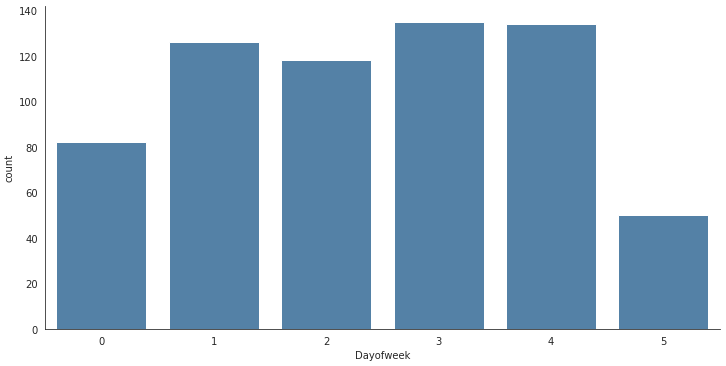

In [42]:
#number of data for each day of week

with sns.axes_style('white'):
    g = sns.catplot("Dayofweek", data=df_2020_dic, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=1)

In [43]:
#Where and what day of week is there waste?
df_2020_dic.groupby(['dropoff_site', 'Dayofweek']).size()

dropoff_site        Dayofweek
BALCONES RECYCLING  2            26
                    3            31
                    4            23
HORNSBY BEND        1            12
                    3            12
                    4            15
ORGANICS BY GOSH    1            15
                    2            15
                    3            29
                    4            42
TDS - MRF           0            48
                    1            47
TDS LANDFILL        0            34
                    1            52
                    2            77
                    3            63
                    4            54
                    5            50
dtype: int64

In [44]:
#Total Data (clean)
print(len(df_2020_dic))

645


In [45]:
#save cleaned dataset 
df_2020.to_csv (r'df_2020.csv', index = False, header=True)

### 2. Prediction Model using Forecasting (ARIMA)

In [46]:
#Load weight for each day of December
df_2020_dic_day = df_2020_dic.groupby("Day")[["load_weight"]].sum()
df_2020_dic_day = df_2020_dic_day.reset_index()
#Days of month without data --> mean of data
mean_2020_dic = df["load_weight"].mean()
data_add = pd.DataFrame({'Day': [2, 5, 6, 13],'load_weight': [mean_2020_dic, mean_2020_dic, mean_2020_dic, mean_2020_dic]})
df_2020_dic_day = df_2020_dic_day.append(data_add, ignore_index = True)
#sort values by day of month
df_2020_dic_day = df_2020_dic_day.sort_values(by=['Day'])

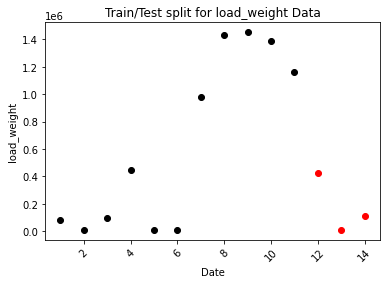

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#select training data (70%) and test data (30%)
train = df_2020_dic_day[df_2020_dic_day['Day'] < 12]
test = df_2020_dic_day[df_2020_dic_day['Day'] >= 12]

#plot training data and test data
plt.scatter(train['Day'], train['load_weight'], color = "black", marker="o")
plt.scatter(test['Day'], test['load_weight'], color = "red", marker="o")
plt.ylabel('load_weight')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for load_weight Data")
plt.show()

RMSE:  903529.8853891903


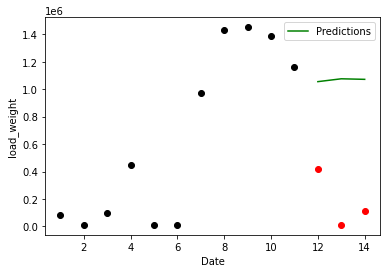

In [63]:
from statsmodels.tsa.arima.model import ARIMA

y = train['load_weight']

#Define and run ARIMA model
#ARIMAmodel = ARIMA(y, order = (4, 11, 12))
ARIMAmodel = ARIMA(y, order = (1, 1, 1))
ARIMAmodel = ARIMAmodel.fit()

#Calculate predictions
y_pred = ARIMAmodel.get_forecast(len(test['Day']))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test['Day']
y_pred_out = y_pred_df["Predictions"] 

#Plot dataset with predictions
plt.scatter(train['Day'], train['load_weight'], color = "black", marker="o")
plt.scatter(test['Day'], test['load_weight'], color = "red", marker="o")
plt.ylabel('load_weight')
plt.xlabel('Date')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

#Metrics: RMSE
arma_rmse = np.sqrt(mean_squared_error(test['load_weight'].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

### 3. Correlation with API Weather

Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')


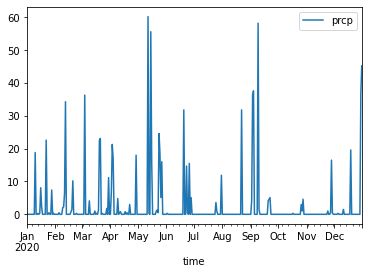

In [52]:
!pip install meteostat -q
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2020, 1, 1)
end = datetime(2020, 12, 31)

# Create Point (latitude; longitude, altitude)
austin = Point(30.2672, -97.7431, 165)

# Get daily data for 2020
data = Daily(austin, start, end)
data = data.fetch()
print(data.columns)

# precipitation
data.plot(y=['prcp'])
plt.show()

      load_weight        load_id    Year  Month       Hour  Dayofweek
Day                                                                  
1     8266.000000  899230.600000  2020.0   12.0  12.200000        1.0
2    10590.000000  899385.125000  2020.0   12.0  11.875000        2.0
3     9738.000000  899086.500000  2020.0   12.0  12.500000        3.0
4    12702.857143  899214.542857  2020.0   12.0  12.400000        4.0
7    13470.389610  899196.480519  2020.0   12.0  13.233766        0.0
8    11595.620438  899200.737226  2020.0   12.0  13.197080        1.0
9    11232.054795  899379.280822  2020.0   12.0  13.280822        2.0
10   10712.230216  899504.589928  2020.0   12.0  12.776978        3.0
11   11366.972477  899689.366972  2020.0   12.0  13.770642        4.0
12    8151.178571  899770.571429  2020.0   12.0  12.410714        5.0
14   11846.896552  899823.344828  2020.0   12.0  13.310345        0.0


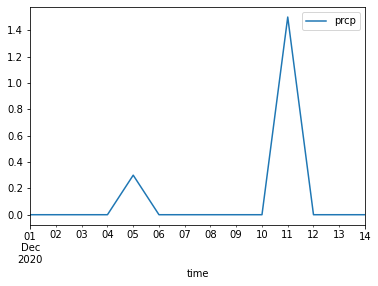

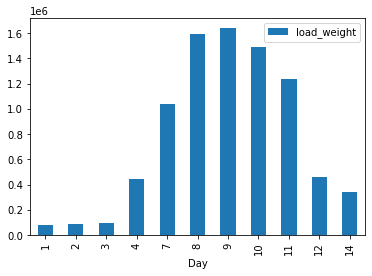

In [53]:
df_2020_December = df_2020[(df_2020['Month'] == 12)]
print(df_2020_December.groupby(['Day']).mean()) # 14 days

start = datetime(2020, 12, 1)
end = datetime(2020, 12, 14)
data = Daily(austin, start, end).fetch()

data.plot(y=['prcp'])

df_2020_December.groupby(['Day']).sum().plot(y='load_weight', kind = 'bar')
plt.show()

### 4. Correlation with Recycle Drop off Locations

In [54]:
import geopandas as gpd
import pandas as pd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math
from geopy.geocoders import Nominatim

In [55]:
# read csv (dataset2) with coordinates of different recycle drop off of Austin in 2020
url2 = 'https://data.austintexas.gov/api/views/9bpw-2ysw/rows.csv?accessType=DOWNLOAD'
df2 = pd.read_csv(url2, sep=',')
df2 = df2.loc[:,['Zone','Business Name','Address','Zip Code']]
df2[['Road','City','Coordinates']] = df2['Address'].str.split('\n',expand=True)
df2 = df2.loc[:,['Zone','Business Name','Road','City','Zip Code','Coordinates']]
df2[['Latitude','Longitude']] = df2['Coordinates'].str.split(',',expand=True)
df2['Latitude']=df2['Latitude'].str.replace('(','')
df2['Longitude']=df2['Longitude'].str.replace(')','')

In [56]:
#Get Points of GeoDataFrame
df2['Latitude'] = df2['Latitude'].astype(float, errors = 'raise')
df2['Longitude'] = df2['Longitude'].astype(float, errors = 'raise')
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.Longitude, df2.Latitude))

In [57]:
#Create dataset with latitude and longitude of drop off of dataset1
data = {'dropoff_site': ['BALCONES RECYCLING', 'HORNSBY BEND', 'TDS - MRF', 'TDS LANDFILL'], 
        'Latitude': [30.32710, 30.38498, 30.11160, 30.11004], 'Longitude': [-97.62632, -97.68206, -97.71330, -97.79703]}
df_dropoff = pd.DataFrame(data)

In [58]:
#Get Points of GeoDataFrame
df_dropoff['Latitude'] = df_dropoff['Latitude'].astype(float, errors = 'raise')
df_dropoff['Longitude'] = df_dropoff['Longitude'].astype(float, errors = 'raise')
gdf_dropoff = gpd.GeoDataFrame(df_dropoff, geometry=gpd.points_from_xy(df_dropoff.Longitude, df_dropoff.Latitude))

In [59]:
# Create a map with localitaions of dataset1 (red) and localitations of dataset2 (blue)
m_1 = folium.Map(location=[30.3,-97.75], tiles='cartodbpositron', zoom_start=10)

# Add points to the map
for idx, row in df2.iterrows():
    Marker([row['Latitude'], row['Longitude']]).add_to(m_1)
    
# Add points to the map
#for idx, row in df_dropoff.iterrows():
#    Marker([row['Latitude'], row['Longitude']]).add_to(m_1)

# Display the map
#m_1

for indice, row in df_dropoff.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        icon=folium.map.Icon(color='yellow')
    ).add_to(m_1)
m_1

## 🖼️ Visualisations
LMER MODEL (Code in Appendix)

PDF
https://drive.google.com/file/d/15-M4Iee8zZxfV1Na9hzoyyAnvT4t8lgP/view?usp=sharing

.ipynb
https://drive.google.com/file/d/15-M4Iee8zZxfV1Na9hzoyyAnvT4t8lgP/view?usp=sharing

## 👓 References
Dataset 1: https://data.austintexas.gov/resource/mbnu-4wq9.csv

Dataset 2: https://data.austintexas.gov/api/views/9bpw-2ysw/rows.csv?accessType=DOWNLOAD

Chapman-Wardy C., Asiedu L., Doku-Amponsah K. and Mettle F.O. Modeling the Amount of Waste Generated by Households in the Greater Accra Region Using Artificial Neural Networks. Journal of Environmental and Public Health. Volume 2021, Article ID 8622105, 12 pages. https://doi.org/10.1155/2021/8622105

J. K. Solano Meza, D. O. Yepes, J. Rodrigo-Ilarri, E. Cassiraga. Predictive analysis of urban waste generation for the city of Bogota, Colombia, through the implementation of decision trees-based machine learning, support vector machines and artificial neural networks. Heliyon 5 (2019) e02810. https://doi.org/10.1016/j.heliyon.2019.e02810

J.A. Araiza-Aguilar, M.N. Rojas-Valencia, R.A. Aguilar-Vera. Forecast generation model of municipal solid waste using multiple linear regression. Global J. Environ. Sci. Manage. 6(1): 1-14 Winter 2020.

## ⏭️ Appendix
Add here any code, images or text that you still find relevant, but that was too long to include in the main report. This section is optional.


In [ ]:
library(lme4)
library(report)

datos <- read.csv(file="C:/Users/monic/Downloads/df_2020.csv", sep=",")

datos$fecha<- as.Date( paste0(datos$Year, "-", datos$Month, "-", datos$Day))
datos$fecha2<- as.Date( substr(datos$load_time,1,10))

datos <- subset(datos , select =c(load_type, load_weight, route_number, fecha, Dayofweek))

datos2 <- aggregate(datos$load_weight, by = list(datos$load_type, datos$route_number, datos$fecha), FUN = sum)

names(datos2) <- c("type","route", "date", "kg")
datos2$day <- weekdays(as.Date(datos2$date))

datos2$dia <- as.numeric(substr(datos2$date, 9,10))

# quitamos outliers
a<-boxplot(datos2$kg)
a$out

datos2<-datos2[!(datos2$kg %in% a$out),]
datos2<-subset(datos2, rownames(datos2)!= "418")

boxplot(datos2$kg)

lmer_model <-lmer(kg ~  day + type + (1|route), data=datos2) 

In [ ]:
summary(lmer_model)
confint(lmer_model)

In [ ]:
report::report(lmer_model)

In [ ]:
plot(lmer_model, witch=1)
lattice::qqmath(lmer_model)